In [1]:
import json 
import pandas as pd 
from pandas.io.json import json_normalize #package for flattening json in pandas df

from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.probability import FreqDist

In [2]:
#load json object
with open('datasets/data_latih.json') as f:
    djson = json.load(f)
#lets put the data into a pandas df
tweets_data = json_normalize(djson)

In [3]:
tweets_data.head()

,akun,id_user,isi,sentimen,tanggal
0,@AhokDjarot,823082326213021696,RT @AhokDjarot: Penasaran sama #BasukiDjarot? ...,netral,Tue Apr 04 14:04:05 +0000 2017
1,@AhokDjarot,3166296157,@AhokDjarot Melayani warga jakarta mulai dari ...,positif,Tue Apr 04 14:00:01 +0000 2017
2,@AhokDjarot,799108167170949121,@Lintank01 @AhokDjarot Golongan sumbu pendek l...,negatif,Tue Apr 04 13:56:37 +0000 2017
3,@AhokDjarot,710566116553166849,RT @RahyaMaya: https://t.co/pvVUIp3YYw Pak Aho...,positif,Tue Apr 04 13:52:44 +0000 2017
4,@AhokDjarot,1335669534,Prof. Edward Omar Sharif H. (Ahli Pidana) : Me...,positif,Tue Apr 04 13:50:01 +0000 2017


In [4]:
mood_count = tweets_data['sentimen'].value_counts()

In [5]:
mood_count

positif    291
negatif    181
netral     178
Name: sentimen, dtype: int64

In [6]:
tweets_data['akun'].value_counts()

@AhokDjarot    650
Name: akun, dtype: int64

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Sentiment Count')

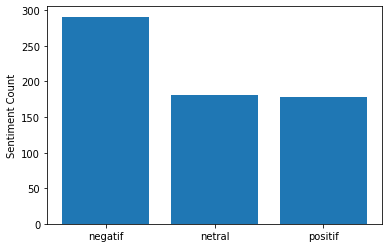

In [8]:
Index = [1,2,3]
plt.bar(Index, mood_count)
plt.xticks(Index, ['negatif', 'netral', 'positif'])
plt.ylabel('Sentiment Count')


In [9]:
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.probability import FreqDist
from nltk.stem.wordnet import WordNetLemmatizer
import re

In [10]:
tn = tweets_data[tweets_data['sentimen'] == 'negatif']
tp = tweets_data[tweets_data['sentimen'] == 'positif']
tr = tweets_data[tweets_data['sentimen'] == 'netral']

tweets = tweets_data['isi']
tweets = tweets.to_string()
tweets = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','URL',tweets)
tweets = re.sub('@[^\s]+','AT_USER',tweets)
tweets = re.sub('[\s]+', ' ', tweets)
tweets = re.sub(r'#([^\s]+)', r'\1', tweets)
tweets = tweets.strip('\'"')

neg = tn['isi']
neg = neg.to_string()
neg = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','URL',neg)
neg = re.sub('@[^\s]+','AT_USER',neg)
neg = re.sub('[\s]+', ' ', neg)
neg = re.sub(r'#([^\s]+)', r'\1', neg)
neg = neg.strip('\'"')
#type(neg)

pos = tn['isi']
pos = pos.to_string()
pos = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','URL',pos)
pos = re.sub('@[^\s]+','AT_USER',pos)
pos = re.sub('[\s]+', ' ', pos)
pos = re.sub(r'#([^\s]+)', r'\1', pos)
pos = pos.strip('\'"')

net = tn['isi']
net = net.to_string()
net = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','URL',net)
net = re.sub('@[^\s]+','AT_USER',net)
net = re.sub('[\s]+', ' ', net)
net = re.sub(r'#([^\s]+)', r'\1', net)
net = net.strip('\'"')

In [11]:
fs = open('datasets/stopword_list_TALA.txt', 'r')
stopwords = [stopword.strip() for stopword in fs.readlines()]
tweets_tokens = word_tokenize(tweets.lower())

In [12]:
tweets_cleaner = [word for word in tweets_tokens if word not in stopwords]
tweets_cleaner=[]
#print(article_cleaner)
for word in tweets_tokens: 
    if word not in stopwords: 
        tweets_cleaner.append(word)

#print(article_tokens)

normalized = ' '.join(word for word in tweets_cleaner)

count = {}
words = []
for w in normalized.split():
    if w in count:
        count[w] += 1
    else:
        count[w] = 1
for word, times in count.items():
    if times > 3:
        #print('%s was found %d times' % (word, times))
        words.append(word)

In [13]:
punctuation=re.compile(r"[-``’//.@?&+#''😂✌️😆!.:,;()|0-9]")
post_punctuation=[]

for words in tweets_cleaner:
    word=punctuation.sub("", words)
    if len(word) > 0:
        post_punctuation.append(word)

In [14]:
fdist = FreqDist()
for word in post_punctuation:
    fdist[word.lower()]+=1
type(fdist)

fdist_top10 = fdist.most_common(20)
new_fdist = dict(fdist_top10)
swords = list(new_fdist.keys())


In [15]:
type(post_punctuation)
s = ' '.join(post_punctuation)
s

'penasaran basukidjarot melayani warga jakarta golongan sumbu pendek l aho prof edward omar sharif h ahli pidana me aho ahok djarot kece penasaran basukidjarot surah al maidah diartikan m ahok penjara sia aho warga negara rep wkwkwk ada d contoh analoginya pencuri i kultwit poinpoin saksi ahl kultwit poinpoin saksi ahl kultwit poinpoin saksi ahl kultwit poinpoin saksi ahl semoga semoga semoga semoga subh ahok membangun masjid warga negara rep warga negara rep warga negara rep warga negara rep ahok djarot kece ahok djarot kece ahok djarot kece ahok djarot kece kultwit poinpoin saksi ahli sidang alhamdulillah ahok ahok didzolimi semoga ahok djarot penasaran basukidjarot menunggu prog subh x nonton ahokdjarotdirosi kompas tv msh a ahok hatinya alhamdulillah bukti angka nya udah tersisi program ahok djar ahokdjarot pelaya perbedaan keren d cerita djarot ahok kece b dikata iki jagoanku mna jagoan kalian subhanallah djarot semoga warga madura d ciuman mesra djarot bu happy blusukan djarot dj

In [16]:
wordcloud = WordCloud(stopwords = 
                      STOPWORDS, width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(s)

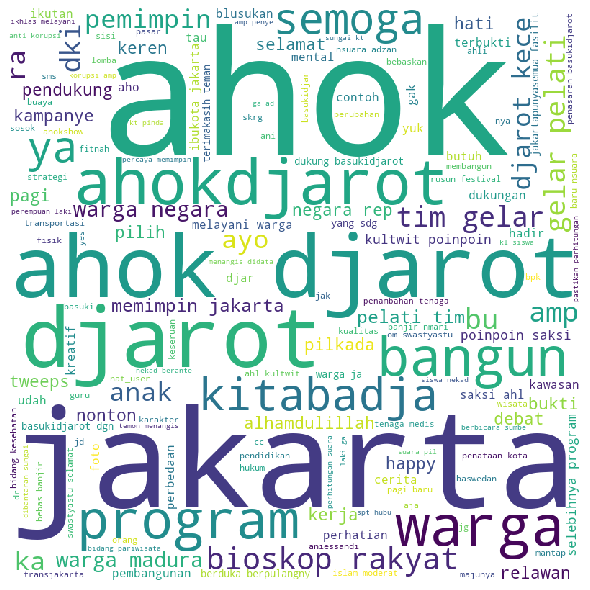

In [17]:
 
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [18]:
from nltk.corpus import stopwords

In [19]:
def tweet_to_words(raw_tweet):

    words = raw_tweet.lower().split()
    stopw = set(stopwords.words("english"))
    
    meaningful_words = [w for w in words if not w in stopw]
    
    return (" ".join(meaningful_words))

In [20]:
#tweets_data['clean_tweets'] = tweets_data['text'].apply(tweet_to_words)

In [21]:
data = tweets_data['isi']
type(data)

pandas.core.series.Series

In [22]:
target = tweets_data['sentimen']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size = 0.2)

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

In [26]:
v = CountVectorizer(analyzer = "word", ngram_range = (1,2))

In [27]:
train_features = v.fit_transform(x_train)

In [28]:
test_features = v.transform(x_test)

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [30]:
clf = DecisionTreeClassifier()
clf.fit(train_features, y_train)
label_prediksi = clf.predict(test_features)
print(classification_report(y_test, label_prediksi))
#clf.score(test_features, y_test)

              precision    recall  f1-score   support

     negatif       0.76      0.72      0.74        39
      netral       0.54      0.69      0.60        32
     positif       0.69      0.61      0.65        59

   micro avg       0.66      0.66      0.66       130
   macro avg       0.66      0.67      0.66       130
weighted avg       0.67      0.66      0.66       130



In [31]:
clf = MultinomialNB()
clf.fit(train_features, y_train)

label_prediksi = clf.predict(test_features)
print(classification_report(y_test, label_prediksi))
#clf.score(test_features, y_test)

              precision    recall  f1-score   support

     negatif       0.87      0.69      0.77        39
      netral       0.57      0.66      0.61        32
     positif       0.68      0.71      0.69        59

   micro avg       0.69      0.69      0.69       130
   macro avg       0.71      0.69      0.69       130
weighted avg       0.71      0.69      0.70       130

